author : 
> Nabiel Husein Shihab / nabielshihab@hotmail.com

# **T IGRF**
***


Script ini dibuat untuk menghitung nilai koreksi T IGRF pada pengolahan data magnetik.
***

### import modules

In [1]:
import pyIGRF
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

plt.style.use('ggplot')
plt.rcParams["font.size"] = "15"

### Custom Function

In [2]:
# membuat fungsi untuk mendapatkan nilai T IGRF di setiap stasiun pada tanggal 1 januari di tahun tertentu
def igrf(year):
    t_igrf = []
    for i in range(len(df_sta)):
        lat = df_sta['Latitude'][i]
        lon = df_sta['Longitude'][i]
        alt = df_sta['Altitude'][i]/1000

        t_igrf.append(pyIGRF.igrf_value(lat, lon, alt, year)[-1])
    
    return t_igrf

# 1. Load Data Koordinat Stasiun
Dalam tabel data koordinat stasiun, terdapat kolom UTM X, UTM Y, Longitude, Latitude, Altitude, dan Icon. Pada perhitungan T IGRF, hanya kolom Longitude, Latitude dan Altitude yang digunakan. Kolom Icon dibentuk oleh penulis untuk plotting simbol stasiun di Google Earth.

In [3]:
# membuka tabel koordinat stasiun
df_sta = pd.read_csv("dataset\\koordinat_stasiun.csv")

#mengubah indeks tabel menjadi nama stasiun
df_sta = df_sta.set_index('Name')


df_sta

,UTM X,UTM Y,Longitude,Latitude,Altitude,Icon
Name,,,,,,
S1,349335,9165464,109.634383,-7.547738,65.870,https://maps.google.com/mapfiles/kml/shapes/pl...
S2,349339,9165784,109.634428,-7.544844,71.498,https://maps.google.com/mapfiles/kml/shapes/pl...
S3,349352,9166192,109.634557,-7.541155,114.761,https://maps.google.com/mapfiles/kml/shapes/pl...
S4,349335,9166682,109.634417,-7.536723,149.515,https://maps.google.com/mapfiles/kml/shapes/pl...
S5,349825,9166635,109.638856,-7.537162,115.859,https://maps.google.com/mapfiles/kml/shapes/pl...
...,...,...,...,...,...,...
S111,355864,9164035,109.693511,-7.560842,45.640,https://maps.google.com/mapfiles/kml/shapes/pl...
S112,356502,9163894,109.699290,-7.562134,51.507,https://maps.google.com/mapfiles/kml/shapes/pl...
S113,356971,9163886,109.703540,-7.562219,56.258,https://maps.google.com/mapfiles/kml/shapes/pl...


# 2. Menghitung T IGRF (nT)
Perhitungan T IGRF dilakukan menggunakan package pyIGRF. Package ini menghitung T IGRF menggunakan IGRF-13. Perhitungan dilakukan pada tanggal 1 Januari di tahun tertentu.

In [4]:
# tahun akuisisi data
year = 2011

# tanggal akuisisi data
date = pd.Timestamp(2011, 2, 11)

# menghitung T IGRF pada tahun akuisisi data
t_igrf = igrf(year)

# menghitung selisih total magnetic field (nT) pada tanggal akuisisi terhadap 1 januari 2011
d_total = (pyIGRF.igrf_variation(df_sta['Latitude'][0],df_sta['Longitude'][0], df_sta['Altitude'][0], 2011)[-1]/365)*((date - pd.Timestamp(2011,1,1))/ timedelta(days=1))

# menambahkan d_total dengan T IGRF dikarenakan tanggal akuisisi data bukan pada 1 januari 2011
t_igrf = t_igrf + d_total

# membuat tabel T IGRF 
df_igrf = pd.DataFrame({
    'Longitude': df_sta['Longitude'],
    'Latitude': df_sta['Latitude'],
    'Altitude': df_sta['Altitude'],
    'T IGRF (nT)': t_igrf})

# menimpan tabel stasiun dengan nilai T IGRF
# df_igrf.to_csv('T IGRF.csv')


df_igrf

,Longitude,Latitude,Altitude,T IGRF (nT)
Name,,,,
S1,109.634383,-7.547738,65.870,45082.539698
S2,109.634428,-7.544844,71.498,45080.970538
S3,109.634557,-7.541155,114.761,45078.110530
S4,109.634417,-7.536723,149.515,45075.105564
S5,109.638856,-7.537162,115.859,45075.779399
...,...,...,...,...
S111,109.693511,-7.560842,45.640,45084.978222
S112,109.699290,-7.562134,51.507,45085.036640
S113,109.703540,-7.562219,56.258,45084.640394


# 3. Visualisasi T IGRF (nT)

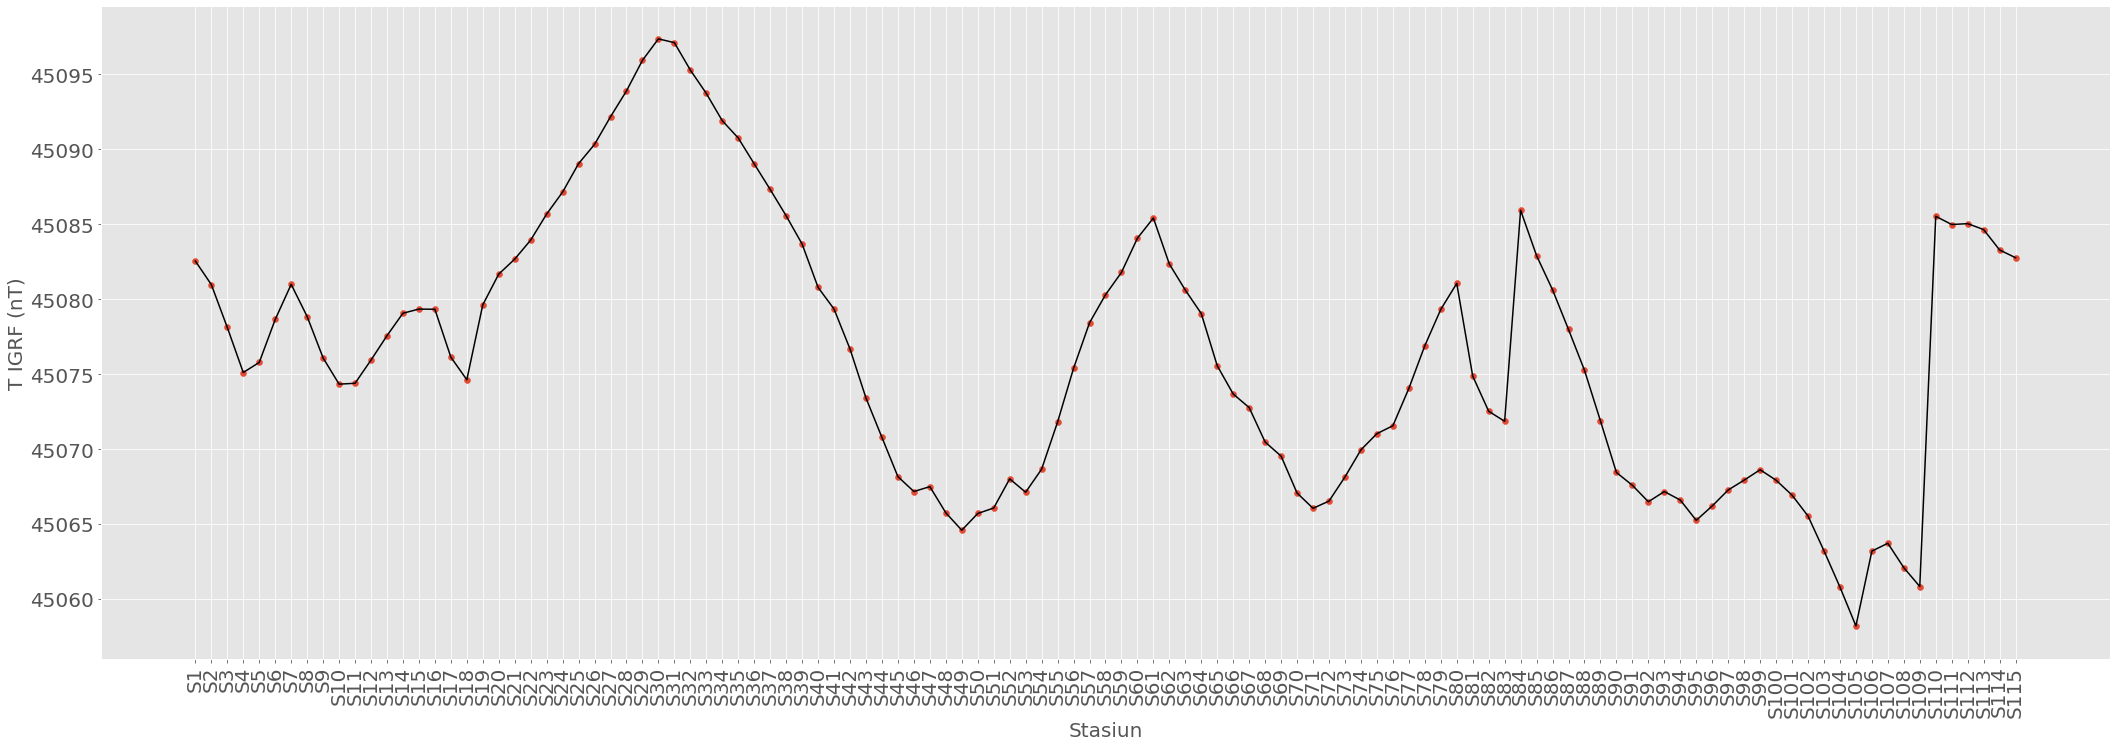

In [5]:
# plot T IGRF per stasiun
plt.figure(figsize=(36,12))
plt.plot(df_sta.index, t_igrf, c='k')
plt.scatter(df_sta.index, t_igrf)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('T IGRF (nT)', fontsize=20)
plt.xlabel('Stasiun', fontsize=20)
plt.show()